# Variant Effect Prediction with Decima

Decima's Variant Effect Prediction (VEP) module allows you to predict the effects of genetic variants on gene expression. This tutorial demonstrates how to use the VEP functionality through both command-line interface (CLI) and Python API. The VEP module takes variant file as input (in TSV or VCF format) and predicts their effects on gene expression across different cell types and tissues if provided.

In [1]:
import os
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


## CLI API

CLI API for variant effect prediction on gene expression.

In [2]:
! decima vep --help

Usage: decima vep [OPTIONS]

  Predict variant effect and save to parquet

  Examples:

      >>> decima vep -v "data/sample.vcf" -o "vep_results.parquet"

      >>> decima vep -v "data/sample.vcf" -o "vep_results.parquet" --tasks
      "cell_type == 'classical monocyte'" # only predict for classical
      monocytes

      >>> decima vep -v "data/sample.vcf" -o "vep_results.parquet" --device 0
      # use device gpu device 0

      >>> decima vep -v "data/sample.vcf" -o "vep_results.parquet" --include-
      cols "gene_name,gene_id" # include gene_name and gene_id columns in the
      output

      >>> decima vep -v "data/sample.vcf" -o "vep_results.parquet" --gene-col
      "gene_name" # use gene_name column as gene names if these option passed
      genes and variants mapped based on these column not based on the genomic
      locus based on the annotaiton.

Options:
  -v, --variants PATH       Path to the variant file .vcf file
  -o, --output_pq PATH      Path to the output parquet 

The VEP module takes a VCF file as input, identifies variants near genes, and predicts their effects on gene expression in a cell type-specific manner. The results are saved as a parquet file containing the following columns:

- chrom: Chromosome where the variant is located
- pos: Genomic position of the variant
- ref: Reference allele
- alt: Alternative allele
- gene: Gene name
- start: Gene start position
- end: Gene end position
- strand: Gene strand
- gene_mask_start: Start position of gene mask
- gene_mask_end: End position of gene mask
- rel_pos: Relative position within gene
- ref_tx: Reference transcript
- alt_tx: Alternative transcript
- tss_dist: Distance to transcription start site
- cell_0, cell_1, etc.: Predicted gene expression changes for each cell type

In [ ]:
! decima vep -v "data/sample.vcf" -o "vep_vcf_results.parquet"

In [4]:
! cat vep_vcf_results.parquet.warnings.log

unknown: 0 / 48 
allele_mismatch_with_reference_genome: 26 / 48 


In [5]:
pd.read_parquet("vep_vcf_results.parquet")

chrom        pos  ref alt        gene      start        end strand  \
0   chr1    1002308    T   C      FAM41C     516455    1040743      -   
1   chr1    1002308    T   C       NOC2L     598861    1123149      -   
2   chr1    1002308    T   C       PERM1     621645    1145933      -   
3   chr1    1002308    T   C        HES4     639724    1164012      -   
4   chr1    1002308    T   C      FAM87B     653531    1177819      +   
5   chr1    1002308    T   C      RNF223     713858    1238146      -   
6   chr1    1002308    T   C    C1orf159     755913    1280201      -   
7   chr1    1002308    T   C      SAMD11     760088    1284376      +   
8   chr1    1002308    T   C      KLHL17     796744    1321032      +   
9   chr1    1002308    T   C     PLEKHN1     802642    1326930      +   
10  chr1    1002308    T   C  TTLL10-AS1     819107    1343395      -   
11  chr1    1002308    T   C       ISG15     837298    1361586      +   
12  chr1    1002308    T   C    TNFRSF18     846144    1370432      -   
13  chr1    1002308    T   C     TNFRSF4     853705    1377993      -   
14  chr1    1002308    T   C        AGRN     856280    1380568      +   
15  chr1    1002308    T   C        SDF4     871619    1395907      -   
16  chr1    1002308    T   C    C1QTNF12     886274    1410562      -   
17  chr1    1002308    T   C      UBE2J2     913437    1437725      -   
18  chr1    1002308    T   C       ACAP3     949161    1473449      -   
19  chr1    1002308    T   C      INTS11     964243    1488531      -   
20  chr1    1002308    T   C        DVL1     988970    1513258      -   
21  chr1    1002308    T   C       MXRA8    1001329    1525617      -   
22  chr1  109727471    A   C       GNAT2  109259481  109783769      -   
23  chr1  109728807  TTT   G       GNAT2  109259481  109783769      -   
24  chr1  109727471    A   C       SYPL2  109302706  109826994      +   
25  chr1  109728807  TTT   G       SYPL2  109302706  109826994      +   
26  chr1  109727471    A   C     ATXN7L2  109319639  109843927      +   
27  chr1  109728807  TTT   G     ATXN7L2  109319639  109843927      +   
28  chr1  109727471    A   C    CYB561D1  109330212  109854500      +   
29  chr1  109728807  TTT   G    CYB561D1  109330212  109854500      +   
30  chr1  109727471    A   C       GPR61  109376032  109900320      +   
31  chr1  109728807  TTT   G       GPR61  109376032  109900320      +   
32  chr1  109727471    A   C       GSTM3  109380590  109904878      -   
33  chr1  109728807  TTT   G       GSTM3  109380590  109904878      -   
34  chr1  109727471    A   C       GNAI3  109384775  109909063      +   
35  chr1  109728807  TTT   G       GNAI3  109384775  109909063      +   
36  chr1  109727471    A   C       AMPD2  109452264  109976552      +   
37  chr1  109728807  TTT   G       AMPD2  109452264  109976552      +   
38  chr1  109727471    A   C       GSTM4  109492259  110016547      +   
39  chr1  109728807  TTT   G       GSTM4  109492259  110016547      +   
40  chr1  109727471    A   C       GSTM2  109504182  110028470      +   
41  chr1  109728807  TTT   G       GSTM2  109504182  110028470      +   
42  chr1  109727471    A   C       GSTM1  109523974  110048262      +   
43  chr1  109728807  TTT   G       GSTM1  109523974  110048262      +   
44  chr1  109727471    A   C       GSTM5  109547940  110072228      +   
45  chr1  109728807  TTT   G       GSTM5  109547940  110072228      +   
46  chr1  109727471    A   C        ALX3  109710224  110234512      -   
47  chr1  109728807  TTT   G        ALX3  109710224  110234512      -   

    gene_mask_start  gene_mask_end  ...  agg_9528  agg_9529  agg_9530  \
0            163840         172672  ... -0.000053 -0.000153 -0.000089   
1            163840         178946  ... -0.000586 -0.000891 -0.000565   
2            163840         170729  ... -0.000565 -0.000787 -0.000515   
3            163840         165050  ... -0.001453 -0.001775 -0.001403   
4            163840         166306  ...  0.000045  0.000105 

Alternatively, you can pass tsv file with following format where first 4 columns are `chrom`, `pos`, `ref`, `alt`.

In [6]:
! cat data/variants.tsv | column -t -s $'\t' 

chrom  pos        ref  alt
chr1   1000018    G    A
chr1   1002308    T    C
chr1   109727471  A    C
chr1   109728286  TTT  G
chr1   109728807  T    GG


You can only run predictions for the variants closer to tss than 100kbp anyway these are the ones likely to be most impactful on the gene expression.

In [7]:
! decima vep -v "data/variants.tsv" -o "vep_results.parquet" --max-distance 100_000 --max-distance-type "tss"

decima.vep - INFO - Using device: cuda and genome: hg38
wandb: Currently logged in as: celikm5 (celikm5-genentech) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact decima_metadata:latest, 628.05MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1276.1MB/s)
wandb: Downloading large artifact decima_rep0:latest, 2155.88MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.1 (1916.9MB/s)
wandb: Downloading large artifact human_state_dict_fold0:latest, 709.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1417.4MB/s)
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/celikm5/miniforge3/envs/decima/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logge

If you have already have mapping genes and variant, you can use this mapping so predictions only will be conducted between this pairs.

In [8]:
! decima vep -v "data/variants_gene.tsv" -o "vep_gene_results.parquet" --gene-col "gene"

decima.vep - INFO - Using device: cuda and genome: hg38
wandb: Currently logged in as: celikm5 (celikm5-genentech) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact decima_metadata:latest, 628.05MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1311.1MB/s)
wandb: Downloading large artifact decima_rep0:latest, 2155.88MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.1 (1900.4MB/s)
wandb: Downloading large artifact human_state_dict_fold0:latest, 709.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1475.9MB/s)
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/celikm5/miniforge3/envs/decima/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logge

In [9]:
pd.read_parquet("vep_gene_results.parquet")

chrom      pos ref alt   gene   start      end strand  gene_mask_start  \
0  chr1  1000018   G   A  ISG15  837298  1361586      +           163840   
1  chr1  1002308   T   C  ISG15  837298  1361586      +           163840   

   gene_mask_end  ...  agg_9528  agg_9529  agg_9530  agg_9531  agg_9532  \
0         177242  ... -0.000746  0.002301  0.005067  0.000135 -0.000559   
1         177242  ...  0.007558  0.004934  0.007966  0.007595 -0.001943   

   agg_9533  agg_9535  agg_9536  agg_9537  agg_9538  
0 -0.003155  0.006503 -0.001059 -0.000566  0.000964  
1  0.001598  0.007838  0.002528  0.007137  0.009534  

[2 rows x 8870 columns]

The vep api reads n (default=10_000) number of variants from vcf file performs predictions on these variants, saves them to parquet file then performs predictios for next next chuck. You can change chucksize:

In [10]:
! decima vep -v "data/sample.vcf" -o "vep_vcf_results.parquet" --chunksize 1

decima.vep - INFO - Using device: cuda and genome: hg38
wandb: Currently logged in as: celikm5 (celikm5-genentech) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact decima_metadata:latest, 628.05MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1365.3MB/s)
wandb: Downloading large artifact decima_rep0:latest, 2155.88MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.2 (1851.4MB/s)
wandb: Downloading large artifact human_state_dict_fold0:latest, 709.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1323.7MB/s)
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/celikm5/miniforge3/envs/decima/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logge

wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1359.5MB/s)
wandb: Downloading large artifact decima_rep0:latest, 2155.88MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.1 (1939.7MB/s)
wandb: Downloading large artifact human_state_dict_fold0:latest, 709.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1425.5MB/s)
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/celikm5/miniforge3/envs/decima/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: PossibleUserWarning: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=95` in the `DataLoader` to i

### Python API

Similarly, variant effect prediction can be performed using the Python API as well.

In [11]:
import pandas as pd
import torch
from decima.vep import predict_variant_effect

device = "cuda" if torch.cuda.is_available() else "cpu"

%matplotlib inline

In [12]:
df_variant = pd.read_table("data/variants.tsv")
df_variant

chrom        pos  ref alt
0  chr1    1000018    G   A
1  chr1    1002308    T   C
2  chr1  109727471    A   C
3  chr1  109728286  TTT   G
4  chr1  109728807    T  GG

Simply pass your dataframe to `predict_variat_effect` function which will return dataframe for the prediction. You can pass `tasks` query to subset predictions for specific cells. Moreover, by default decima model for replicate 0 is used to use other replicates pass model=`1` , `2` or `3` to use other replicates or pass your custom model. If you pass `include_cols` argument the columns in the input will maintained in the output. To further variants based on distance to tss use `max_dist_tss` argument.

In [13]:
predict_variant_effect(df_variant)

wandb: Currently logged in as: celikm5 (celikm5-genentech) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact decima_metadata:latest, 628.05MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1339.8MB/s)
wandb: Downloading large artifact decima_rep0:latest, 2155.88MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.2 (1791.0MB/s)
wandb: Downloading large artifact human_state_dict_fold0:latest, 709.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1495.3MB/s)
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/celikm5/miniforge3/envs/decima/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: UserWarning: Startin

Predicting: |          | 0/? [00:00<?, ?it/s]

chrom        pos  ref alt    gene      start        end strand  \
0   chr1    1000018    G   A  FAM41C     516455    1040743      -   
1   chr1    1002308    T   C  FAM41C     516455    1040743      -   
2   chr1    1000018    G   A   NOC2L     598861    1123149      -   
3   chr1    1002308    T   C   NOC2L     598861    1123149      -   
4   chr1    1000018    G   A   PERM1     621645    1145933      -   
..   ...        ...  ...  ..     ...        ...        ...    ...   
77  chr1  109728286  TTT   G   GSTM5  109547940  110072228      +   
78  chr1  109728807    T  GG   GSTM5  109547940  110072228      +   
79  chr1  109727471    A   C    ALX3  109710224  110234512      -   
80  chr1  109728286  TTT   G    ALX3  109710224  110234512      -   
81  chr1  109728807    T  GG    ALX3  109710224  110234512      -   

    gene_mask_start  gene_mask_end  ...  agg_9528  agg_9529  agg_9530  \
0            163840         172672  ... -0.003487 -0.006149 -0.003175   
1            163840         172672  ... -0.000096 -0.000190 -0.000135   
2            163840         178946  ... -0.002595 -0.004256 -0.002759   
3            163840         178946  ... -0.000587 -0.000894 -0.000563   
4            163840         170729  ... -0.002933 -0.004738 -0.003541   
..              ...            ...  ...       ...       ...       ...   
77           163840         227488  ... -0.004391  0.004506 -0.017141   
78           163840         227488  ... -0.129386 -0.144098 -0.077484   
79           163840         174642  ...  0.000218  0.000532  0.000263   
80           163840         174642  ... -0.000218 -0.000109 -0.000204   
81           163840         174642  ... -0.001127 -0.002115 -0.001278   

    agg_9531  agg_9532  agg_9533  agg_9535  agg_9536  agg_9537  agg_9538  
0  -0.002726 -0.003147 -0.001746 -0.002291 -0.005283 -0.003393 -0.006694  
1  -0.000043 -0.000076 -0.000072 -0.000106  0.000029 -0.000055 -0.000119  
2  -0.001601 -0.002601 -0.001238 -0.001756 -0.002918 -0.001914 -0.003244  
3  -0.000324 -0.000471 -0.000258 -0.000382 -0.000683 -0.000459 -0.000757  
4  -0.001943 -0.002958 -0.001370 -0.002272 -0.003326 -0.002195 -0.003648  
..       ...       ...       ...       ...       ...       ...       ...  
77  0.000025  0.042810  0.024843 -0.022073  0.043973  0.005934 -0.006544  
78 -0.091391 -0.104009 -0.034113 -0.096020 -0.063028 -0.079460 -0.102111  
79  0.000122  0.000352  0.000184  0.000139  0.000887  0.000173  0.000558  
80  0.000009 -0.000265 -0.000104 -0.000189  0.000523 -0.000149 -0.000385  
81 -0.000581 -0.001344 -0.000724 -0.000569 -0.003553 -0.000857 -0.002281  

[82 rows x 8870 columns]

You can predict and save predictions to file similar to CLI api based on dataframe.

In [14]:
predict_variant_effect(df_variant, output_pq="vep_results_py.parquet", device=device)

wandb: Downloading large artifact decima_metadata:latest, 628.05MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1289.8MB/s)
wandb: Downloading large artifact decima_rep0:latest, 2155.88MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.2 (1774.2MB/s)
wandb: Downloading large artifact human_state_dict_fold0:latest, 709.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1430.2MB/s)
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [15]:
pd.read_parquet("vep_results_py.parquet")

chrom        pos  ref alt    gene      start        end strand  \
0   chr1    1000018    G   A  FAM41C     516455    1040743      -   
1   chr1    1002308    T   C  FAM41C     516455    1040743      -   
2   chr1    1000018    G   A   NOC2L     598861    1123149      -   
3   chr1    1002308    T   C   NOC2L     598861    1123149      -   
4   chr1    1000018    G   A   PERM1     621645    1145933      -   
..   ...        ...  ...  ..     ...        ...        ...    ...   
77  chr1  109728286  TTT   G   GSTM5  109547940  110072228      +   
78  chr1  109728807    T  GG   GSTM5  109547940  110072228      +   
79  chr1  109727471    A   C    ALX3  109710224  110234512      -   
80  chr1  109728286  TTT   G    ALX3  109710224  110234512      -   
81  chr1  109728807    T  GG    ALX3  109710224  110234512      -   

    gene_mask_start  gene_mask_end  ...  agg_9528  agg_9529  agg_9530  \
0            163840         172672  ... -0.003487 -0.006149 -0.003175   
1            163840         172672  ... -0.000096 -0.000190 -0.000135   
2            163840         178946  ... -0.002595 -0.004256 -0.002759   
3            163840         178946  ... -0.000587 -0.000894 -0.000563   
4            163840         170729  ... -0.002933 -0.004738 -0.003541   
..              ...            ...  ...       ...       ...       ...   
77           163840         227488  ... -0.004391  0.004506 -0.017141   
78           163840         227488  ... -0.129386 -0.144098 -0.077484   
79           163840         174642  ...  0.000218  0.000532  0.000263   
80           163840         174642  ... -0.000218 -0.000109 -0.000204   
81           163840         174642  ... -0.001127 -0.002115 -0.001278   

    agg_9531  agg_9532  agg_9533  agg_9535  agg_9536  agg_9537  agg_9538  
0  -0.002726 -0.003147 -0.001746 -0.002291 -0.005283 -0.003393 -0.006694  
1  -0.000043 -0.000076 -0.000072 -0.000106  0.000029 -0.000055 -0.000119  
2  -0.001601 -0.002601 -0.001238 -0.001756 -0.002918 -0.001914 -0.003244  
3  -0.000324 -0.000471 -0.000258 -0.000382 -0.000683 -0.000459 -0.000757  
4  -0.001943 -0.002958 -0.001370 -0.002272 -0.003326 -0.002195 -0.003648  
..       ...       ...       ...       ...       ...       ...       ...  
77  0.000025  0.042810  0.024843 -0.022073  0.043973  0.005934 -0.006544  
78 -0.091391 -0.104009 -0.034113 -0.096020 -0.063028 -0.079460 -0.102111  
79  0.000122  0.000352  0.000184  0.000139  0.000887  0.000173  0.000558  
80  0.000009 -0.000265 -0.000104 -0.000189  0.000523 -0.000149 -0.000385  
81 -0.000581 -0.001344 -0.000724 -0.000569 -0.003553 -0.000857 -0.002281  

[82 rows x 8870 columns]

Or variant effect can be performed on vcf file.

In [16]:
predict_variant_effect("data/sample.vcf", output_pq="vep_results_vcf_py.parquet", device=device)

wandb: Downloading large artifact decima_metadata:latest, 628.05MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1272.2MB/s)
wandb: Downloading large artifact decima_rep0:latest, 2155.88MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.2 (1862.4MB/s)
wandb: Downloading large artifact human_state_dict_fold0:latest, 709.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1514.0MB/s)
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [17]:
pd.read_parquet("vep_results_vcf_py.parquet")

chrom        pos  ref alt        gene      start        end strand  \
0   chr1    1002308    T   C      FAM41C     516455    1040743      -   
1   chr1    1002308    T   C       NOC2L     598861    1123149      -   
2   chr1    1002308    T   C       PERM1     621645    1145933      -   
3   chr1    1002308    T   C        HES4     639724    1164012      -   
4   chr1    1002308    T   C      FAM87B     653531    1177819      +   
5   chr1    1002308    T   C      RNF223     713858    1238146      -   
6   chr1    1002308    T   C    C1orf159     755913    1280201      -   
7   chr1    1002308    T   C      SAMD11     760088    1284376      +   
8   chr1    1002308    T   C      KLHL17     796744    1321032      +   
9   chr1    1002308    T   C     PLEKHN1     802642    1326930      +   
10  chr1    1002308    T   C  TTLL10-AS1     819107    1343395      -   
11  chr1    1002308    T   C       ISG15     837298    1361586      +   
12  chr1    1002308    T   C    TNFRSF18     846144    1370432      -   
13  chr1    1002308    T   C     TNFRSF4     853705    1377993      -   
14  chr1    1002308    T   C        AGRN     856280    1380568      +   
15  chr1    1002308    T   C        SDF4     871619    1395907      -   
16  chr1    1002308    T   C    C1QTNF12     886274    1410562      -   
17  chr1    1002308    T   C      UBE2J2     913437    1437725      -   
18  chr1    1002308    T   C       ACAP3     949161    1473449      -   
19  chr1    1002308    T   C      INTS11     964243    1488531      -   
20  chr1    1002308    T   C        DVL1     988970    1513258      -   
21  chr1    1002308    T   C       MXRA8    1001329    1525617      -   
22  chr1  109727471    A   C       GNAT2  109259481  109783769      -   
23  chr1  109728807  TTT   G       GNAT2  109259481  109783769      -   
24  chr1  109727471    A   C       SYPL2  109302706  109826994      +   
25  chr1  109728807  TTT   G       SYPL2  109302706  109826994      +   
26  chr1  109727471    A   C     ATXN7L2  109319639  109843927      +   
27  chr1  109728807  TTT   G     ATXN7L2  109319639  109843927      +   
28  chr1  109727471    A   C    CYB561D1  109330212  109854500      +   
29  chr1  109728807  TTT   G    CYB561D1  109330212  109854500      +   
30  chr1  109727471    A   C       GPR61  109376032  109900320      +   
31  chr1  109728807  TTT   G       GPR61  109376032  109900320      +   
32  chr1  109727471    A   C       GSTM3  109380590  109904878      -   
33  chr1  109728807  TTT   G       GSTM3  109380590  109904878      -   
34  chr1  109727471    A   C       GNAI3  109384775  109909063      +   
35  chr1  109728807  TTT   G       GNAI3  109384775  109909063      +   
36  chr1  109727471    A   C       AMPD2  109452264  109976552      +   
37  chr1  109728807  TTT   G       AMPD2  109452264  109976552      +   
38  chr1  109727471    A   C       GSTM4  109492259  110016547      +   
39  chr1  109728807  TTT   G       GSTM4  109492259  110016547      +   
40  chr1  109727471    A   C       GSTM2  109504182  110028470      +   
41  chr1  109728807  TTT   G       GSTM2  109504182  110028470      +   
42  chr1  109727471    A   C       GSTM1  109523974  110048262      +   
43  chr1  109728807  TTT   G       GSTM1  109523974  110048262      +   
44  chr1  109727471    A   C       GSTM5  109547940  110072228      +   
45  chr1  109728807  TTT   G       GSTM5  109547940  110072228      +   
46  chr1  109727471    A   C        ALX3  109710224  110234512      -   
47  chr1  109728807  TTT   G        ALX3  109710224  110234512      -   

    gene_mask_start  gene_mask_end  ...  agg_9528  agg_9529  agg_9530  \
0            163840         172672  ... -0.000096 -0.000190 -0.000135   
1            163840         178946  ... -0.000587 -0.000894 -0.000563   
2            163840         170729  ... -0.000845 -0.001181 -0.000784   
3            163840         165050  ... -0.001767 -0.002189 -0.001705   
4            163840         166306  ... -0.000098  0.000052 

## Developer API

To perform variant effect prediction, Decima creates dataset and dataloader from the given set of variants:

In [18]:
from decima.data.dataset import VariantDataset

dataset = VariantDataset(df_variant)

wandb: Downloading large artifact decima_metadata:latest, 628.05MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1290.4MB/s)


Dataset prepares one_hot encoded sequence with gene mask which is ready to pass to the model:

In [19]:
len(dataset)

164

In [20]:
dataset[0]

{'seq': tensor([[0., 1., 0.,  ..., 1., 0., 1.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 'warning': []}

In [ ]:
dataset[0]["seq"].shape

torch.Size([5, 524288])

In [22]:
dataset.variants

chrom        pos  ref alt    gene      start        end strand  \
0   chr1    1000018    G   A  FAM41C     516455    1040743      -   
1   chr1    1002308    T   C  FAM41C     516455    1040743      -   
2   chr1    1000018    G   A   NOC2L     598861    1123149      -   
3   chr1    1002308    T   C   NOC2L     598861    1123149      -   
4   chr1    1000018    G   A   PERM1     621645    1145933      -   
..   ...        ...  ...  ..     ...        ...        ...    ...   
77  chr1  109728286  TTT   G   GSTM5  109547940  110072228      +   
78  chr1  109728807    T  GG   GSTM5  109547940  110072228      +   
79  chr1  109727471    A   C    ALX3  109710224  110234512      -   
80  chr1  109728286  TTT   G    ALX3  109710224  110234512      -   
81  chr1  109728807    T  GG    ALX3  109710224  110234512      -   

    gene_mask_start  gene_mask_end  rel_pos ref_tx alt_tx  tss_dist  
0            163840         172672    40725      C      T   -123115  
1            163840         172672    38435      A      G   -125405  
2            163840         178946   123131      C      T    -40709  
3            163840         178946   120841      A      G    -42999  
4            163840         170729   145915      C      T    -17925  
..              ...            ...      ...    ...    ...       ...  
77           163840         227488   180346    TTT      G     16506  
78           163840         227488   180867      T     GG     17027  
79           163840         174642   507041      T      G    343201  
80           163840         174642   506226    AAA      C    342386  
81           163840         174642   505705      A     CC    341865  

[82 rows x 14 columns]

Let's load model

In [ ]:
from decima.hub import load_decima_model

model = load_decima_model(device=device)

wandb: Downloading large artifact decima_rep0:latest, 2155.88MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.2 (1808.4MB/s)
wandb: Downloading large artifact human_state_dict_fold0:latest, 709.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1487.8MB/s)


The model has `predict_on_dataset` method which performs prediction for the dataset object:

In [24]:
preds = model.predict_on_dataset(dataset, devices=device)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/celikm5/miniforge3/envs/decima/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: PossibleUserWarning: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=95` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

The `preds` are predicted expression for `alt - ref` alleles for each variant:

In [25]:
preds["expression"].shape

(82, 8856)

In [26]:
preds["expression"]

array([[-3.1028390e-03, -3.5525560e-03, -3.5931766e-03, ...,
        -5.2702725e-03, -3.3913553e-03, -6.6891909e-03],
       [ 1.1469424e-04,  1.7350912e-04,  8.1568956e-05, ...,
         1.3417006e-04,  1.1980534e-05, -2.7149916e-05],
       [ 6.0230494e-05, -8.2150102e-05, -2.6747584e-05, ...,
        -2.7078092e-03, -1.8020868e-03, -3.0442923e-03],
       ...,
       [ 5.8137625e-04,  6.4936280e-04,  4.9999356e-04, ...,
         8.4596872e-04,  1.6248971e-04,  5.3709745e-04],
       [ 2.6370510e-03,  2.7481169e-03,  1.8703863e-03, ...,
         5.3109229e-04, -1.4962628e-04, -3.7675351e-04],
       [-2.8469041e-03, -3.2258853e-03, -2.4763122e-03, ...,
        -3.5528541e-03, -8.5747242e-04, -2.2805035e-03]], dtype=float32)

In [27]:
preds["warnings"]  # some of the variants does not match with the genome genome sequence.

Counter({'allele_mismatch_with_reference_genome': 26, 'unknown': 0})

You can perform prediction for the individual alleles with directly using the api:

In [28]:
dl = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=False)
batch = next(iter(dl))

In [29]:
batch["seq"].shape  # first allele and second allele

torch.Size([2, 5, 524288])

In [ ]:
model = model.to(device)

with torch.no_grad():
    preds = model(batch["seq"].to(device))

The variant has little difference between reference and alternative alleles so it is likely neural based on the model.

Text(0, 0.5, 'gene expression for alt allele')

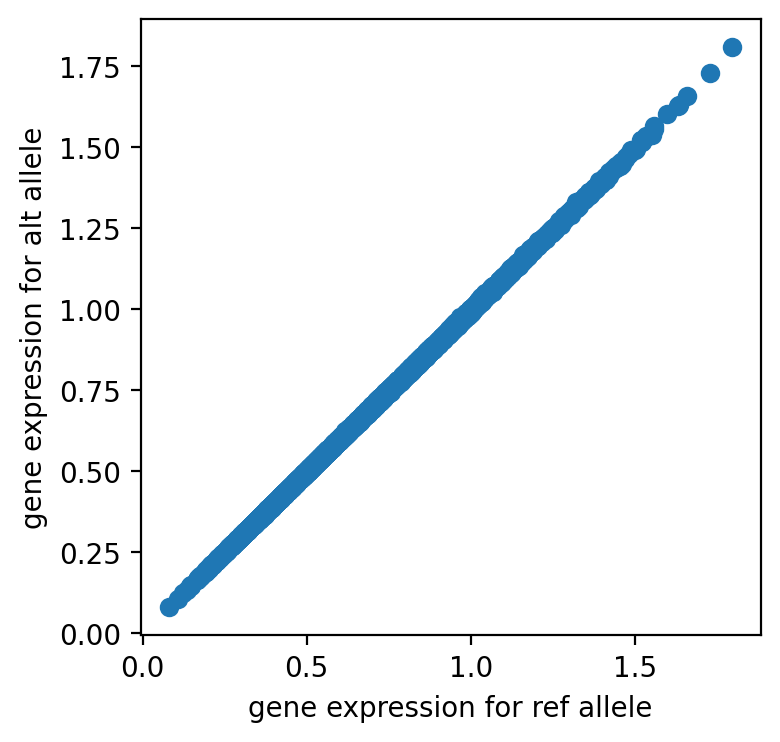

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4), dpi=200)
plt.scatter(preds[0, :, 0].cpu().numpy(), preds[1, :, 0].cpu().numpy())
plt.xlabel("gene expression for ref allele")
plt.ylabel("gene expression for alt allele")